# Bungee Superman - Problem A2

## Questions
1. How long was Lois Lane in apparent free-fall? Ans: T1 = 8.0 seconds
2. How far would she have fallen int his time? 
Ans: xt = x0 + v0*t + 0.5 g*t^2

Assuming: 
- x0 and v0 to be 0
- Earth's gravitational force = 9.8 m/s2
- t = 8 seconds
Distance travelled is xt = 0 + 0 + 0.5*9.8*8^2 = 313.6 mts

3. What speed would she have been when Superman caught her?

Ans: Speed (V) = distance/time = 313.6m/8s = 39.2 m/s

4. How long did it take Superman to stop Lois Lane?
Ans: He caught her on the 8 seconds. It took him 3 seconds to bring her up. So T2 = 11 seconds

# Bungee Jumping Analogy
Let us now get to our bungee jumping analogy. Lois Lane drops from a platform and free falls for T1 seconds. 
We will take the estimated distance as D that she travelled in free-fall. 
This would be the length of the bungee cord.

D = l = 313.6 mts

Since the bungee cord is the superman, it will stretch and stop at time T2, which is 11 seconds.
Mass of Lois Lane is 45 kgs
Air resistance is ignored

## The Bungee Equation

Notations:

$x$ = vertical distance measured from point of jump, positive downwards

$M$ = mass of jumper

$L$ = unstretched length of bungee cord

$k$ = elastic constant of cord, i.e. magnitude of force = $kx$ 

$g$ = earth's gravitational acceleration, Force = $Mg$

Total force downwards (ignoring air resistance):  $F(x) = Mg$ if $x \le L$; otherwise $F(x) = Mg-k(x-L)$.

Bungee jump equation is then

$\frac{d^2x}{dt^2} = G(x)$

with $G(x) = g$ if $x\le L$, else $G(x) = g - (k/M)*(x - L)$

Equivalently, in the form of two first-order equations (with the new variables $y_1 = x$, $y_2 = dx/dt$),

$\frac{dy_1}{dt} = y_2\,,\qquad \frac{dy_2}{dt} = G(y_1, y_2)$.

(We have allowed the possibility that $G$ depends on the two new variables, $y_1$ and $y_2$ - it depends only on $y_1$ (i.e. $x$) when air friction is ignored.  As can be seen below, $G$ will also depend on $y_2$ (i.e. $dx/dt$, the velocity) when air friction is included.

If an air resistance term proportional to the square of the velocity is considered, we need to include an addition force term 

$-\frac{c}{M}\,\left\vert\frac{dx}{dt}\right\vert\,\frac{dx}{dt} = -\frac{c}{M}\,\left\vert y_2\right\vert\,y_2$

where $\vert\cdot\vert$ denotes the absolute value, and $c$ is a positive constant (drag coefficient).


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint  # this is needed to integrate the differential equation(s)

# parameters
L = 313.6 # length of the cord in m
g = 9.8     # m/sec^2
M = 45.0    # weight of Lois Lane in kg
k = 45   # N/m ... this needs to be adjusted
c = 0       # approximate drag coefficient, as air resistance is not considered

t = np.linspace(0, 11, 100) # we will create 100 data points

y0 = [0.0, 0.0] # initial velocity and acceleration


In [52]:
def G(y, M=M, c=c, k=k):
    """Calculates velocity and acceleration
    Args:
        y = [velocity, acceleration] array at time t0...t11 seconds
        t = time of the data point in seconds
        M = mass of Lois Lane in kg
        c = drag coefficient for air resistance
        k = elasticity in N/m
    Returns:
        [velocity mts/s, acceleration mts/s^2]"""

    G1 = y[1]   # this is first value to be returned, dy_1/dt
    if (y[0] <= L):
        G2 = g - (c/M)*abs(y[1])*y[1]   # this is the second value to be returned, dy_2/dt
                                        # gravity & air resistance only, since cord is not stretched
    else:
        G2 = g - (k/M)*(y[0] - L) - (c/M)*abs(y[1])*y[1]    # cord stretched
                                            
    return [G1, G2]



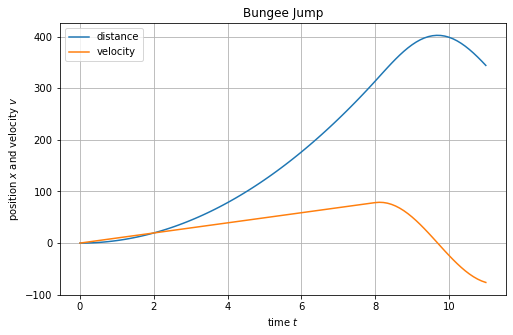

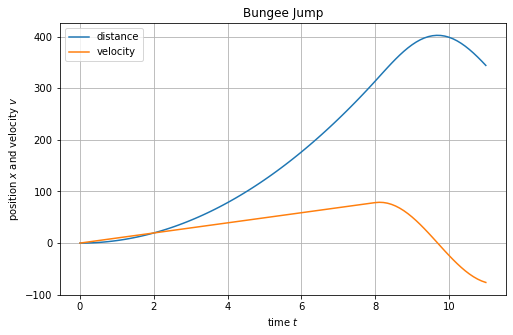

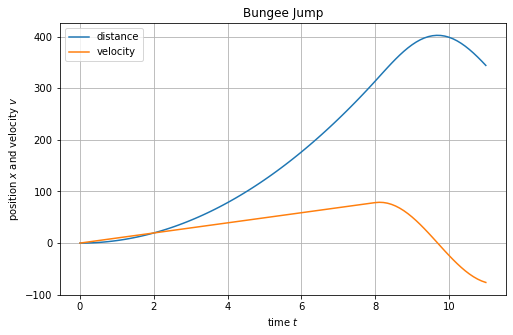

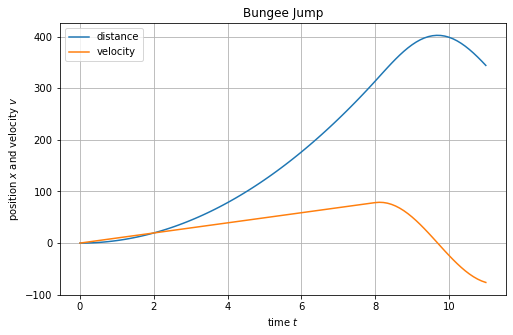

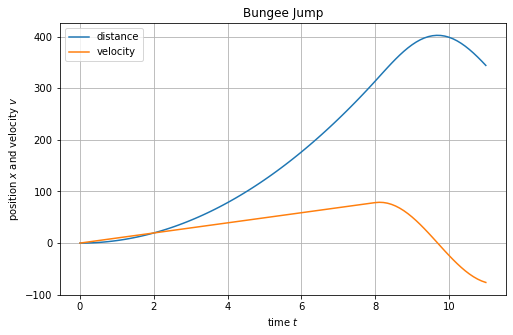

In [51]:
kvals = [10, 45, 80, 115, 150]
for k in kvals:
    yns = odeint(G, y0, t, args=(k, )) # gives the array of distance and velolcity at each time point
    plt.figure(figsize=(8,5))
    plt.xlabel('time $t$')
    plt.ylabel('position $x$ and velocity $v$')
    plt.title("Bungee Jump")
    plt.grid()
    plt.plot(t, yns)
    plt.legend(('distance', 'velocity'), loc=0)
plt.show()

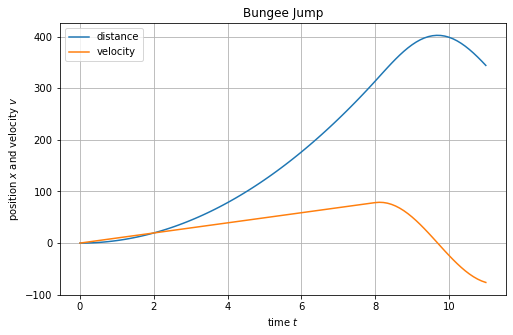

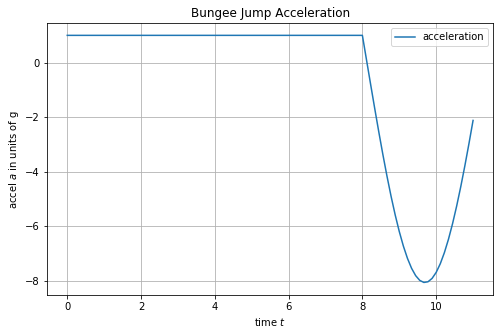

In [50]:
a = np.zeros(100) # initialize acceleration array

for i in range(len(a)): # at each data point
    f = (G(yns[i, :], t[i])) # generates velocity and acceleration through differentiation
    a[i] = f[1]/g  # acceleration is the second element of the array
# plot the acceleration
plt.figure(figsize=(8,5))
plt.xlabel('time $t$')
plt.ylabel('accel $a$ in units of g')
plt.title("Bungee Jump Acceleration")
plt.grid()
plt.plot(t,a, label='acceleration')
plt.legend()
plt.show()

In [45]:
yns[99]

array([515.09972592,  32.76059169])